In [79]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error
import io

In [80]:
# Чтение загруженного CSV файла
df = pd.read_csv('sample_data/california_housing_train.csv', encoding='utf-8')
print(df.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  median_house_value  
0      1015.0       472.0         1.4936             66900.0  
1      1129.0       463.0         1.8200             80100.0  
2       333.0       117.0         1.6509             85700.0  
3       515.0       226.0         3.1917             73400.0  
4       624.0       262.0         1.9250             65500.0  


In [81]:
# Получаем список всех столбцов в данных
print("Столбцы данных:", df.columns)

Столбцы данных: Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')


In [82]:
# Получаем размеры данных (количество строк и столбцов)
print("Размеры данных:", df.shape)

Размеры данных: (17000, 9)


In [83]:
# Выводим статистическое описание данных, включая среднее значение, стандартное отклонение и т.д.
print(df.describe())

          longitude      latitude  housing_median_age   total_rooms  \
count  17000.000000  17000.000000        17000.000000  17000.000000   
mean    -119.562108     35.625225           28.589353   2643.664412   
std        2.005166      2.137340           12.586937   2179.947071   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.790000     33.930000           18.000000   1462.000000   
50%     -118.490000     34.250000           29.000000   2127.000000   
75%     -118.000000     37.720000           37.000000   3151.250000   
max     -114.310000     41.950000           52.000000  37937.000000   

       total_bedrooms    population    households  median_income  \
count    17000.000000  17000.000000  17000.000000   17000.000000   
mean       539.410824   1429.573941    501.221941       3.883578   
std        421.499452   1147.852959    384.520841       1.908157   
min          1.000000      3.000000      1.000000       0.499900   
25%        297.00000

In [84]:
# Проверка на наличие пропусков
print("Проверка на наличие пропусков:")
print(df.isnull().sum())

Проверка на наличие пропусков:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64


In [85]:
# Проверка на наличие пропусков и удаление дубликатов
df.fillna(df.mean(), inplace=True)
duplicate_count = df.duplicated().sum()
if duplicate_count > 0:
    df = df.drop_duplicates()

In [86]:
# Определение признаков (X) и целевой переменной (y)
X = df[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
         'total_bedrooms', 'population', 'households', 'median_income']]
y = df['median_house_value']

In [87]:
# Нормализация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [88]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [89]:
# Создание модели
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [90]:
# Компиляция модели
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [91]:
# Обучение модели
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
340/340 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 56271257600.0000 - mae: 206918.0781 - val_loss: 53995212800.0000 - val_mae: 202954.0781
Epoch 2/50
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 53818073088.0000 - mae: 201509.3594 - val_loss: 48330985472.0000 - val_mae: 189777.3281
Epoch 3/50
340/340 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 47533371392.0000 - mae: 186023.2656 - val_loss: 37181001728.0000 - val_mae: 160774.1250
Epoch 4/50
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 34687160320.0000 - mae: 152858.9531 - val_loss: 24968425472.0000 - val_mae: 124396.1328
Epoch 5/50
340/340 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 22795864064.0000 - mae: 116464.6562 - val_loss: 16405258240.0000 - val_mae: 94773.1094
Epoch 6/50
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 15034082304.0000 - mae: 90713.6953 - val_loss: 12730088448.0000 - val_mae: 81729.5859
Epoch 7/50
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 12049684480.0000 - mae: 81314.6094 - val_loss: 11328528

In [92]:
# Оценка модели на тестовых данных
loss, mae = model.evaluate(X_test, y_test)
print(f'Loss on test data: {loss}')
print(f'Mean Absolute Error (MAE): {mae}')

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4600521216.0000 - mae: 48162.5781
Loss on test data: 4268240640.0
Mean Absolute Error (MAE): 46844.89453125


In [93]:
# Прогнозирование
y_pred = model.predict(X_test)

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [94]:
# Оценка модели
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Squared Error (MSE): 4268240201.816888
Root Mean Squared Error (RMSE): 65331.77023330141


In [95]:
# Пояснения к результатам
print("\nПояснения к результатам:")
print("MAE (Mean Absolute Error) показывает среднюю ошибку предсказания.")
print("MSE (Mean Squared Error) показывает среднюю квадратичную ошибку.")
print("RMSE (Root Mean Squared Error) дает представление о размере ошибки в тех же единицах, что и целевая переменная.")


Пояснения к результатам:
MAE (Mean Absolute Error) показывает среднюю ошибку предсказания.
MSE (Mean Squared Error) показывает среднюю квадратичную ошибку.
RMSE (Root Mean Squared Error) дает представление о размере ошибки в тех же единицах, что и целевая переменная.


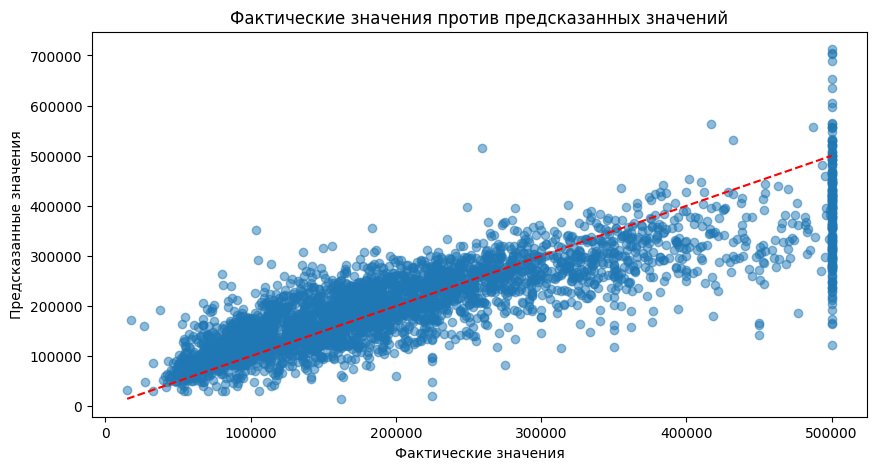

In [96]:
# Визуализация прогнозов
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Фактические значения против предсказанных значений')
plt.show()

In [97]:
# Создание DataFrame для фактических и предсказанных значений
results_df = pd.DataFrame({
    'Фактические значения': y_test,
    'Предсказанные значения': y_pred.flatten()  # Используем flatten(), чтобы получить одномерный массив
})
# Выводим первые несколько строк результирующего DataFrame
print(results_df.head())
# Дополнительно можно сохранить результаты в CSV файл, если это необходимо
results_df.to_csv('predictions.csv', index=False, encoding='utf-8')

       Фактические значения  Предсказанные значения
10941              142700.0           137256.484375
5250               500001.0           411457.906250
10292               61800.0            78690.242188
2266               162800.0           132947.156250
6398                90600.0           149072.078125


In [101]:
# Создание DataFrame для тестовых данных с предсказанными значениями
X_test_df = pd.DataFrame(X_test, columns=['longitude', 'latitude', 'housing_median_age',
                                           'total_rooms', 'total_bedrooms', 'population',
                                           'households', 'median_income'])
results_df = X_test_df.copy()
results_df['Предсказанная стоимость жилья'] = y_pred.flatten()  # Добавляем предсказанные значения
# Выводим первые несколько строк результирующего DataFrame
print(results_df.head())
# Сохранение результатов в CSV файл с заданной кодировкой
results_df.to_csv('predictions_with_features.csv', index=False, encoding='utf-8')

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0  -0.652280  1.003508           -1.556370     1.006630        0.902968   
1   0.709243 -0.708951            1.859971     0.045110       -0.278563   
2  -0.243325  0.633879           -1.000221     0.486877        0.473536   
3   1.068326 -0.751061           -1.556370     1.289673        0.812811   
4   0.649396 -0.774455            1.859971    -0.602172       -0.458877   

   population  households  median_income  Предсказанная стоимость жилья  
0    0.897725    1.096925      -0.150767                  137256.484375  
1   -0.240956   -0.226839       2.216247                  411457.906250  
2    0.900339    0.509163      -0.710014                   78690.242188  
3    1.381251    0.927878       0.182654                  132947.156250  
4   -0.248797   -0.362077      -1.232104                  149072.078125  


In [103]:
# Определяем целевые переменные (можете добавить другие по необходимости)
y = df[['median_house_value', 'total_rooms', 'total_bedrooms']]
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
# Создание модели
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(y_train.shape[1])  # Количество выходных нейронов соответствует количеству целевых переменных
])
# Компиляция модели
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
# Обучение модели
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)
# Прогнозирование
y_pred = model.predict(X_test)
# Создание DataFrame для тестовых данных с предсказанными значениями
X_test_df = pd.DataFrame(X_test, columns=['longitude', 'latitude', 'housing_median_age',
                                           'total_rooms', 'total_bedrooms', 'population',
                                           'households', 'median_income'])
# Добавляем предсказанные значения
results_df = X_test_df.copy()
results_df['Предсказанная стоимость жилья'] = y_pred[:, 0]  # Предсказание для median_house_value
results_df['Предсказанные общие комнаты'] = y_pred[:, 1]  # Предсказание для total_rooms
results_df['Предсказанные спальни'] = y_pred[:, 2]  # Предсказание для total_bedrooms
# Сохранение результатов в CSV файл с правильной кодировкой
results_df.to_csv('predictions_multiple.csv', index=False, encoding='utf-8-sig')

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


340/340 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 18601035776.0000 - mae: 69858.7734 - val_loss: 18015152128.0000 - val_mae: 68250.4844
Epoch 2/50
340/340 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 18167119872.0000 - mae: 68193.7812 - val_loss: 16156978176.0000 - val_mae: 63842.0547
Epoch 3/50
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 16020060160.0000 - mae: 62961.1914 - val_loss: 12466868224.0000 - val_mae: 54305.5430
Epoch 4/50
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 11524645888.0000 - mae: 51411.6055 - val_loss: 8373145600.0000 - val_mae: 42191.7266
Epoch 5/50
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7842350592.0000 - mae: 40228.6719 - val_loss: 5456217600.0000 - val_mae: 32045.6738
Epoch 6/50
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5080607232.0000 - mae: 31071.6992 - val_loss: 4154866688.0000 - val_mae: 27455.9492
Epoch 7/50
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4128808192.0000 - mae: 27997.0000 - val_loss: 3685571840.0000 - val_mae: 25982.2

In [105]:
print(results_df.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0  -0.652280  1.003508           -1.556370     1.006630        0.902968   
1   0.709243 -0.708951            1.859971     0.045110       -0.278563   
2  -0.243325  0.633879           -1.000221     0.486877        0.473536   
3   1.068326 -0.751061           -1.556370     1.289673        0.812811   
4   0.649396 -0.774455            1.859971    -0.602172       -0.458877   

   population  households  median_income  Предсказанная стоимость жилья  \
0    0.897725    1.096925      -0.150767                  135507.109375   
1   -0.240956   -0.226839       2.216247                  413127.500000   
2    0.900339    0.509163      -0.710014                   79529.664062   
3    1.381251    0.927878       0.182654                  133890.343750   
4   -0.248797   -0.362077      -1.232104                  149570.390625   

   Предсказанные общие комнаты  Предсказанные спальни  
0                  3443.652588            

In [98]:
# Корреляционная матрица (если есть числовые данные)
if df.select_dtypes(include=['number']).shape[1] > 0:
    correlation_matrix = df.corr()
    print("Корреляционная матрица:")
    print(correlation_matrix)

Корреляционная матрица:
                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.925208           -0.114250     0.047010   
latitude            -0.925208  1.000000            0.016454    -0.038773   
housing_median_age  -0.114250  0.016454            1.000000    -0.360984   
total_rooms          0.047010 -0.038773           -0.360984     1.000000   
total_bedrooms       0.071802 -0.069373           -0.320434     0.928403   
population           0.101674 -0.111261           -0.295890     0.860170   
households           0.059628 -0.074902           -0.302754     0.919018   
median_income       -0.015485 -0.080303           -0.115932     0.195383   
median_house_value  -0.044982 -0.144917            0.106758     0.130991   

                    total_bedrooms  population  households  median_income  \
longitude                 0.071802    0.101674    0.059628      -0.015485   
latitude                 -0.069373   -0.111261   -0.074902   

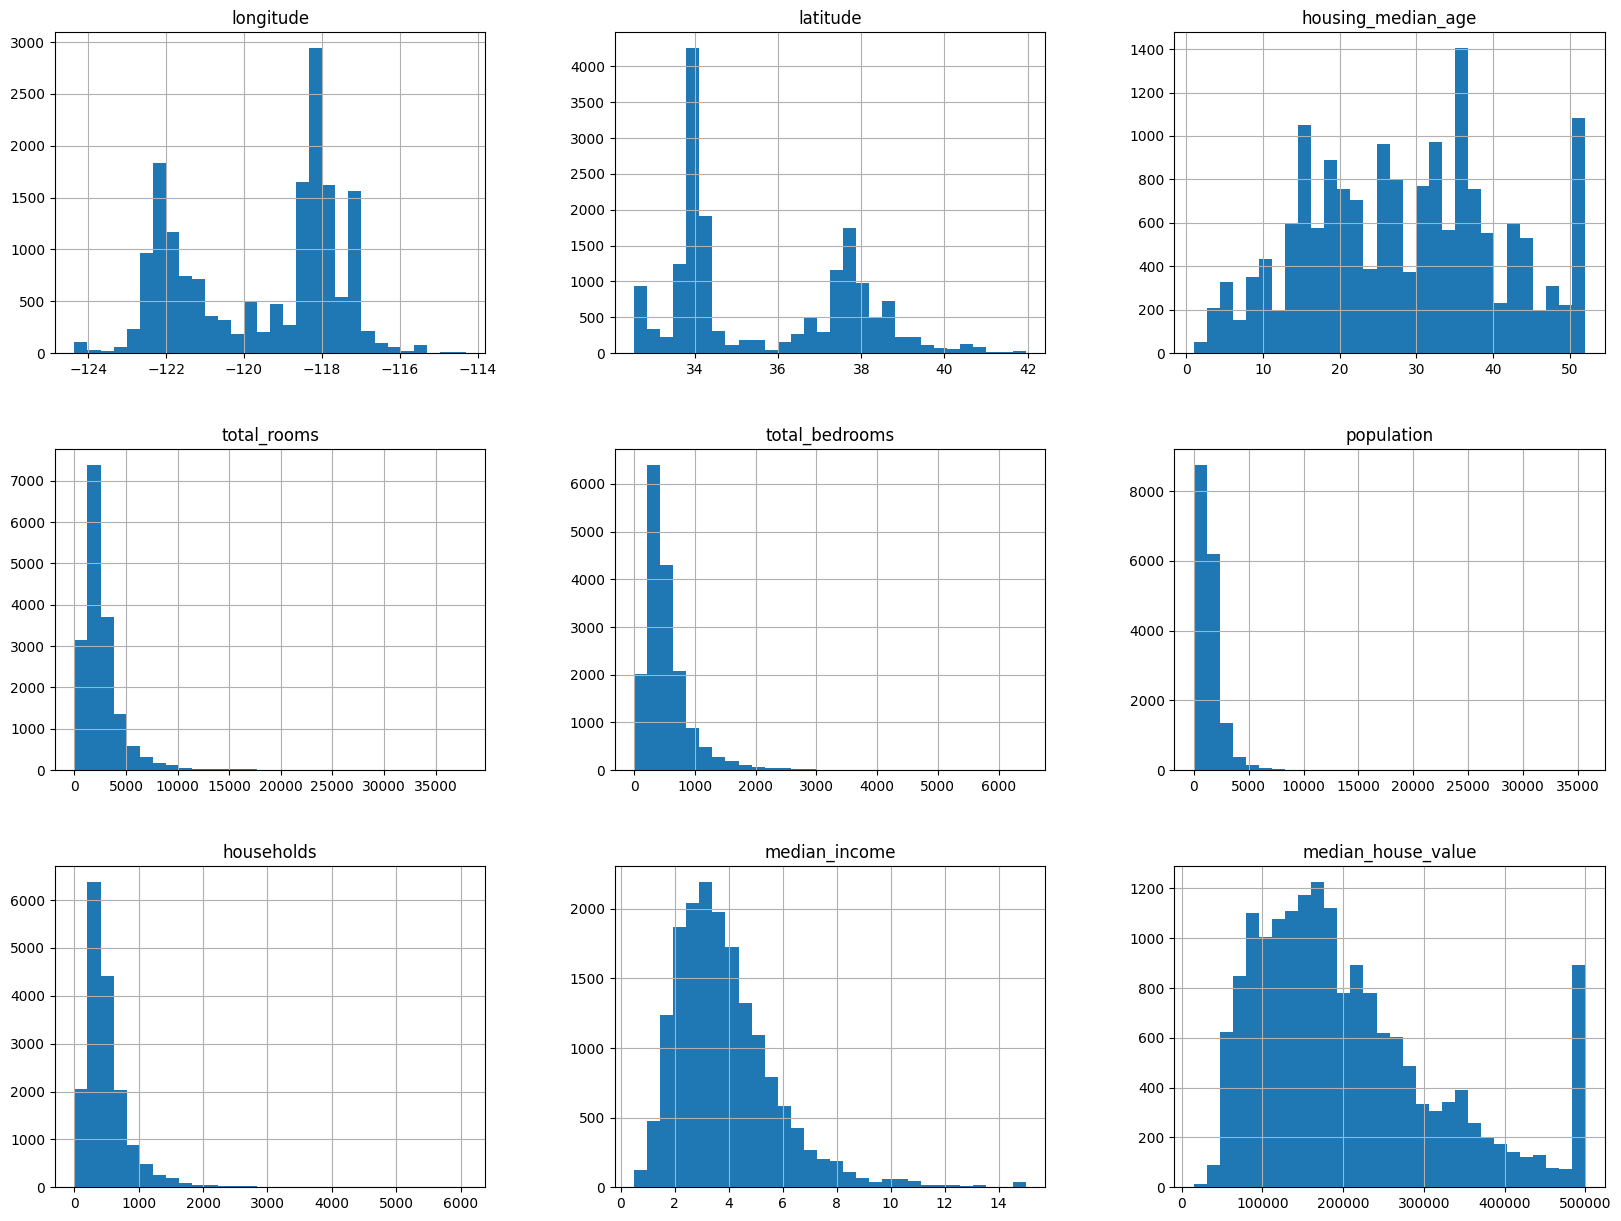

In [99]:
# Визуализация данных
# Гистограммы для числовых данных
df.select_dtypes(include=['number']).hist(bins=30, figsize=(20, 15))
plt.show()

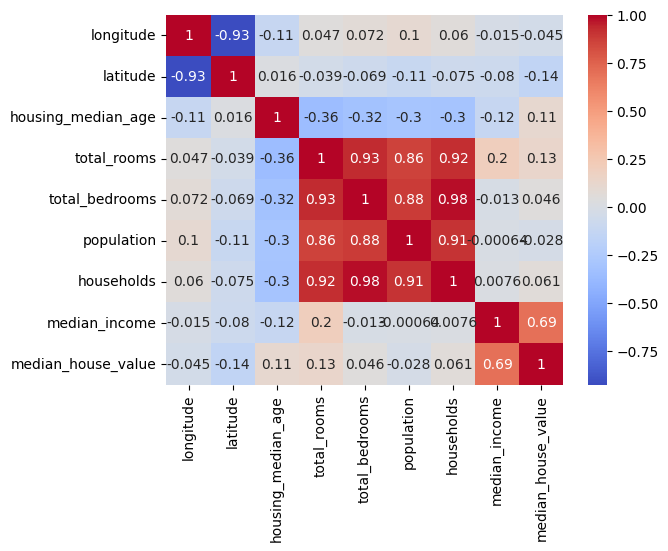

In [104]:
# Тепловая карта корреляций
if df.select_dtypes(include=['number']).shape[1] > 0:
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.show()